<a href="https://colab.research.google.com/github/rohanrohan2012/AgeDetection/blob/master/AgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import zipfile
import matplotlib.pyplot as plt
import cv2
os.getcwd()

'/content'

In [0]:
link='/content/train.csv'
labels=pd.read_csv(link)
classes=list(labels['Class'].unique())
print(classes)
d = dict(zip(classes, range(0,3)))
labels['Class']=labels['Class'].map(d, na_action='ignore')
ids=labels.drop('ID',axis=1)
labels=labels.drop('ID',axis=1)
labels.shape

['MIDDLE', 'YOUNG', 'OLD']


(19906, 1)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
handle_train=zipfile.ZipFile(r'/content/Train.zip')
handle_train.extractall('/content/train')
handle_train.close()
handle_test=zipfile.ZipFile(r'/content/Test.zip')
handle_test.extractall('/content/test')
handle_test.close()

In [0]:
images_test = []
mean=None
folder="test/Test"
for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename))
    if img is not None:
        images_test.append(cv2.resize(img,(125,100),interpolation = cv2.INTER_NEAREST)) 

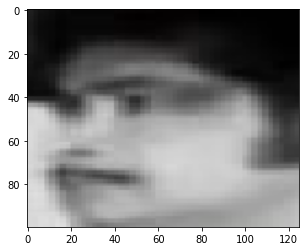

In [0]:
plt.imshow(images_test[0])

In [50]:
images_train=[]
folder="train/Train"
mean_h=0
mean_w=0
i=0
for filename in os.listdir(folder):
  img=cv2.imread(os.path.join(folder,filename))
  if i>0 and i<10:
    print(filename)
  i=i+1
  if img is not None:
    mean_h=mean_h+(img.shape[0])
    mean_w=mean_w+(img.shape[1])
    images_train.append(cv2.resize(img,(125,100),interpolation = cv2.INTER_NEAREST))

15667.jpg
10286.jpg
10062.jpg
11106.jpg
8819.jpg
16586.jpg
3781.jpg
6829.jpg
2438.jpg


19906
125.46724605646538 99.01070029136943


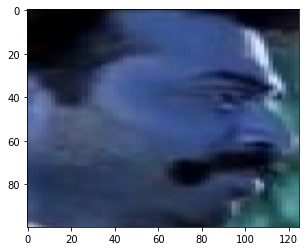

In [0]:
print(len(images_train))
plt.imshow(images_train[376])
print(mean_h/19906,mean_w/19906)